In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
df = pd.read_excel(r"C:\Users\n1332878\Desktop\dta\global_precipitation_anomaly\global-precipitation-anomaly.xlsx")

In [47]:
df.head

<bound method NDFrame.head of             Entity Code  Year  Annual precipitation anomaly
0      Afghanistan  AFG  1940                   -138.702740
1      Afghanistan  AFG  1941                   -159.571560
2      Afghanistan  AFG  1942                    -56.291832
3      Afghanistan  AFG  1943                    -10.771976
4      Afghanistan  AFG  1944                    -31.937382
...            ...  ...   ...                           ...
16570     Zimbabwe  ZWE  2020                     80.621710
16571     Zimbabwe  ZWE  2021                     55.459040
16572     Zimbabwe  ZWE  2022                     40.831573
16573     Zimbabwe  ZWE  2023                     43.327750
16574     Zimbabwe  ZWE  2024                   -311.788600

[16575 rows x 4 columns]>

In [50]:
uk_data = df[df["Entity"]=="United Kingdom"]

In [51]:
uk_data = uk_data.drop("Entity",axis="columns")

In [52]:
uk_data

,Code,Year,Annual precipitation anomaly
15555,GBR,1940,-203.366400
15556,GBR,1941,-263.882140
15557,GBR,1942,-199.741620
15558,GBR,1943,-178.602230
15559,GBR,1944,-136.174900
...,...,...,...
15635,GBR,2020,131.669240
15636,GBR,2021,13.207481
15637,GBR,2022,-18.438183
15638,GBR,2023,128.993990


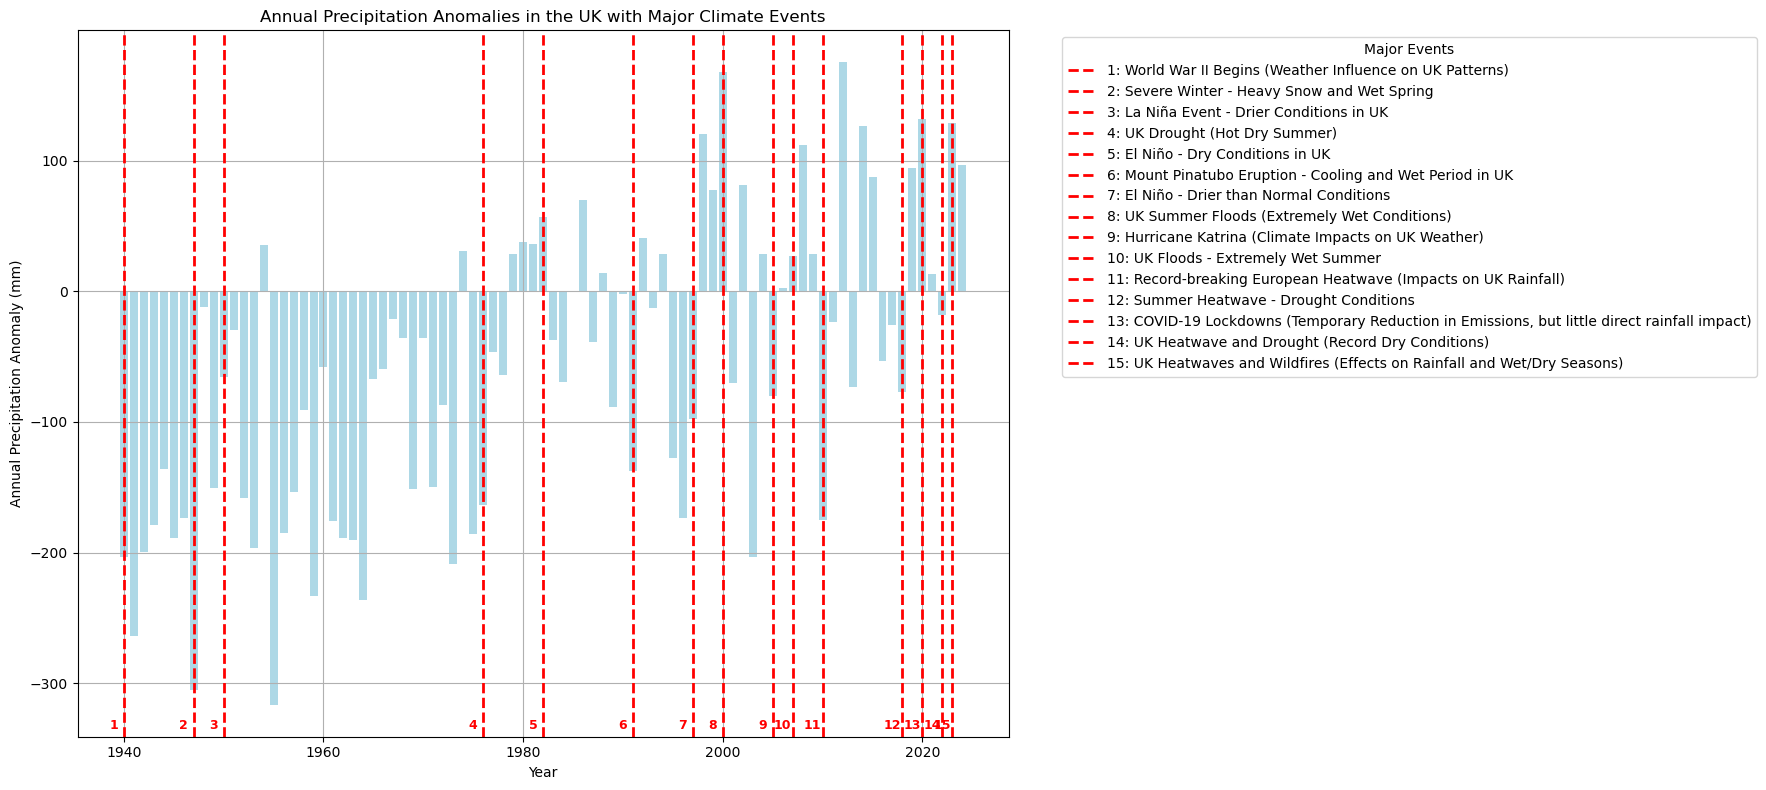

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` is already loaded, and it has columns: 'Code', 'Year', and 'Annual precipitation anomaly'
# Example: df = pd.read_csv("your_precipitation_data.csv")
df = uk_data
# Major Climate-Altering Events that specifically affected UK rainfall
events = [
    (1940, "World War II Begins (Weather Influence on UK Patterns)"),
    (1947, "Severe Winter - Heavy Snow and Wet Spring"),
    (1950, "La Niña Event - Drier Conditions in UK"),
    (1976, "UK Drought (Hot Dry Summer)"),
    (1982, "El Niño - Dry Conditions in UK"),
    (1991, "Mount Pinatubo Eruption - Cooling and Wet Period in UK"),
    (1997, "El Niño - Drier than Normal Conditions"),
    (2000, "UK Summer Floods (Extremely Wet Conditions)"),
    (2005, "Hurricane Katrina (Climate Impacts on UK Weather)"),
    (2007, "UK Floods - Extremely Wet Summer"),
    (2010, "Record-breaking European Heatwave (Impacts on UK Rainfall)"),
    (2018, "Summer Heatwave - Drought Conditions"),
    (2020, "COVID-19 Lockdowns (Temporary Reduction in Emissions, but little direct rainfall impact)"),
    (2022, "UK Heatwave and Drought (Record Dry Conditions)"),
    (2023, "UK Heatwaves and Wildfires (Effects on Rainfall and Wet/Dry Seasons)")
]

"""# Create the bar plot
plt.figure(figsize=(12, 8))

# Plotting the data from the DataFrame as bars
plt.bar(df['Year'], df['Annual precipitation anomaly'], color='skyblue', alpha=0.6, label="Precipitation Anomalies")
"""
"""# Add markers for major events that affected UK rainfall
for event in events:
    # Check if the event year is in the DataFrame
    if event[0] in df['Year'].values:
        anomaly_value = df.loc[df['Year'] == event[0], 'Annual precipitation anomaly'].values[0]
        #fetches anomaly value (like the precip anomaly value)
        
        # Annotate with a vertical line and event description
        
        if anomaly_value >= 0:
            plt.annotate(event[1],
                     xy=(event[0], 35),
                     xytext=(event[0], 10),  # Adjust the text position as needed
                     arrowprops=dict(facecolor='red', arrowstyle="->"),
                     fontsize=9, color='red', ha='center', va='center')
        else:
            plt.annotate(event[1],
                     xy=(event[0], -30),
                     xytext=(event[0], -10),  # Adjust the text position as needed
                     arrowprops=dict(facecolor='red', arrowstyle="->"),
                     fontsize=9, color='red', ha='center', va='center')
"""

plt.figure(figsize=(18, 8))

# Plotting the data from the DataFrame as bars with a simple color
plt.bar(df['Year'], df['Annual precipitation anomaly'], color='lightblue', label="Precipitation Anomalies")

# Add simple markers for major events
event_labels = {}  # To store event number and description
for i, event in enumerate(events, 1):  # Starting numbering from 1
    if event[0] in df['Year'].values:
        anomaly_value = df.loc[df['Year'] == event[0], 'Annual precipitation anomaly'].values[0]
        # Add a vertical line marker with a simple number as label
        plt.axvline(x=event[0], color='red', linestyle='--', linewidth=2)  # Vertical line for event
        plt.text(event[0]-1, -335, str(i), rotation=0, ha='center', fontsize=9, color='red', fontweight='bold')
        #parameter ...(event[0]...,anomaly_value+20, str(i)...
        # Store the number and corresponding event description in the dictionary
        event_labels[i] = event[1]

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Annual Precipitation Anomaly (mm)')
plt.title('Annual Precipitation Anomalies in the UK with Major Climate Events')

# Adding a grid for better visibility
plt.grid(True)

# Create the legend for the event numbers on the side
handles, labels = [], []
for num, desc in event_labels.items():
    handles.append(plt.Line2D([0], [0], color='red', lw=2, linestyle='--'))  # Red dashed line for the event
    labels.append(f'{num}: {desc}')  # Label each event with its number and description

plt.legend(handles=handles, labels=labels, title="Major Events", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
df = uk_data

In [44]:
def calculate_change(event_year, df):
    # Get the 10 years before the event and the 5 years after the event
    before_years = df[(df['Year'] >= event_year - 10) & (df['Year'] < event_year)]
    # right so this was more than event year -10 and also that it is less than the event year.
    after_years = df[(df['Year'] > event_year) & (df['Year'] <= event_year + 5)]
    # and this was greater than event year, and less than event year + 5, setting the boundary. Remember, that this
    # was a boolean condition used to extract the dataset where the Year attribute meets the stated condition.

    # Calculate the average precipitation anomaly for 10 years before and 5 years after the event
    avg_before = before_years['Annual precipitation anomaly'].mean() if not before_years.empty else None
    # I see that this is a cautious condition that only calculates mean if the before_years is not empty. Which was the case
    # with 1940
    avg_after = after_years['Annual precipitation anomaly'].mean() if not after_years.empty else None
    # the same case being applied here
    
    # Calculate the change in precipitation anomaly
    change = avg_after - avg_before if avg_before is not None and avg_after is not None else None #coolest condition ever
    # for now, using the change in average metric to get a straightforward indicator of significant changes.
    return avg_before, avg_after, change

# Create a list to store the results
event_changes = []

# Loop over the events to calculate the change for each
for event in events: #this is where I applied the formula piecemeal. events contains that big list of tuples from earlier.
    event_year, description = event #tuple elements extracted into
    avg_before, avg_after, change = calculate_change(event_year, df)
    
    # Append the event description and its change to the list
    event_changes.append({
        'Event': description,
        'Event Year': event_year,
        'Avg Precipitation (10 years before)': avg_before,
        'Avg Precipitation (5 years after)': avg_after,
        'Change': change
    })

# Convert the list of event changes into a DataFrame for better display
event_changes_df = pd.DataFrame(event_changes)

# Display the results
event_changes_df

,Event,Event Year,Avg Precipitation (10 years before),Avg Precipitation (5 years after),Change
0,World War II Begins (Weather Influence on UK P...,1940,NaN,-193.473550,NaN
1,Severe Winter - Heavy Snow and Wet Spring,1947,-192.008277,-83.170438,108.837839
2,La Niña Event - Drier Conditions in UK,1950,-181.101452,-133.104425,47.997026
3,UK Drought (Hot Dry Summer),1976,-90.393628,-1.650378,88.743250
4,El Niño - Dry Conditions in UK,1982,-62.233681,-15.092307,47.141373
5,Mount Pinatubo Eruption - Cooling and Wet Peri...,1991,-5.915262,-49.090776,-43.175513
6,El Niño - Drier than Normal Conditions,1997,-49.786400,75.517915,125.304315
7,UK Summer Floods (Extremely Wet Conditions),2000,-28.435370,-48.695009,-20.259640
8,Hurricane Katrina (Climate Impacts on UK Weather),2005,-19.581514,-0.922201,18.659313
9,UK Floods - Extremely Wet Summer,2007,2.820177,23.546982,20.726804


### Same code, but with a T-test

In [60]:
import pandas as pd
from scipy import stats

# Your existing function to calculate the change in precipitation
def calculate_change(event_year, df):
    # Get the 10 years before the event and the 5 years after the event
    before_years = df[(df['Year'] >= event_year - 10) & (df['Year'] < event_year)]
    after_years = df[(df['Year'] > event_year) & (df['Year'] <= event_year + 5)]
    
    # Calculate the average precipitation anomaly for 10 years before and 5 years after the event
    avg_before = before_years['Annual precipitation anomaly'].mean() if not before_years.empty else None
    avg_after = after_years['Annual precipitation anomaly'].mean() if not after_years.empty else None
    
    # Calculate the change in precipitation anomaly
    change = avg_after - avg_before if avg_before is not None and avg_after is not None else None
    
    # Return the results including before, after, and the change
    return avg_before, avg_after, change, before_years['Annual precipitation anomaly'], after_years['Annual precipitation anomaly']

# Create a list to store the results
event_changes = []

# Loop over the events to calculate the change for each
for event in events:
    event_year, description = event  # Tuple elements extracted into variables
    avg_before, avg_after, change, before_data, after_data = calculate_change(event_year, df)
    #extracts pre and post averages, avg change, and dframe before, and dframe after
    
    # Perform t-test between before and after data (only if we have valid data)
    if before_data is not None and after_data is not None and len(before_data) > 1 and len(after_data) > 1:
        t_stat, p_value = stats.ttest_ind(before_data, after_data)
        #stats test applied on pre-dframe and post-dframe
    else:
        t_stat, p_value = None, None
    
    # Append the event description, its change, and t-test results to the list
    event_changes.append({
        'Event': description,
        'Event Year': event_year,
        'Avg Precipitation (10 years before)': avg_before,
        'Avg Precipitation (5 years after)': avg_after,
        'Change': change,
        'T-statistic': t_stat,
        'P-value': p_value
    })

# Convert the list of event changes into a DataFrame for better display
event_changes_df = pd.DataFrame(event_changes)

# Display the results
event_changes_df


,Event,Event Year,Avg Precipitation (10 years before),Avg Precipitation (5 years after),Change,T-statistic,P-value
0,World War II Begins (Weather Influence on UK P...,1940,NaN,-193.473550,NaN,NaN,NaN
1,Severe Winter - Heavy Snow and Wet Spring,1947,-192.008277,-83.170438,108.837839,-3.550926,0.005260
2,La Niña Event - Drier Conditions in UK,1950,-181.101452,-133.104425,47.997026,-0.869122,0.400542
3,UK Drought (Hot Dry Summer),1976,-90.393628,-1.650378,88.743250,-2.264122,0.041315
4,El Niño - Dry Conditions in UK,1982,-62.233681,-15.092307,47.141373,-1.002615,0.334345
5,Mount Pinatubo Eruption - Cooling and Wet Peri...,1991,-5.915262,-49.090776,-43.175513,1.142937,0.273677
6,El Niño - Drier than Normal Conditions,1997,-49.786400,75.517915,125.304315,-2.833925,0.014084
7,UK Summer Floods (Extremely Wet Conditions),2000,-28.435370,-48.695009,-20.259640,0.358477,0.725740
8,Hurricane Katrina (Climate Impacts on UK Weather),2005,-19.581514,-0.922201,18.659313,-0.274956,0.787672
9,UK Floods - Extremely Wet Summer,2007,2.820177,23.546982,20.726804,-0.312168,0.759863


In [61]:
# Filter the DataFrame to keep only the necessary columns
event_changes_filtered_df = event_changes_df[['Event', 'Event Year', 'Avg Precipitation (10 years before)', 
                                               'Avg Precipitation (5 years after)', 'Change', 'P-value']]

# Filter the DataFrame to keep only rows where p-value < 0.05
event_changes_significant_df = event_changes_filtered_df[event_changes_filtered_df['P-value'] < 0.05]

# Display the filtered DataFrame
event_changes_significant_df


,Event,Event Year,Avg Precipitation (10 years before),Avg Precipitation (5 years after),Change,P-value
1,Severe Winter - Heavy Snow and Wet Spring,1947,-192.008277,-83.170438,108.837839,0.005260
3,UK Drought (Hot Dry Summer),1976,-90.393628,-1.650378,88.743250,0.041315
6,El Niño - Drier than Normal Conditions,1997,-49.786400,75.517915,125.304315,0.014084


In [66]:
event_changes_df.to_excel("event_changes_df.xlsx")
event_changes_significant_df.to_excel("event_changes_significant_df.xlsx")
